In [15]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


In [16]:
df = pd.read_csv("Advertising (1).csv")

df = df.drop(["Unnamed: 0"],axis = 1)
print("Rows,Columns:",df.shape)

Rows,Columns: (200, 4)


In [17]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

## Data Exploration 

### Correlation Analysis

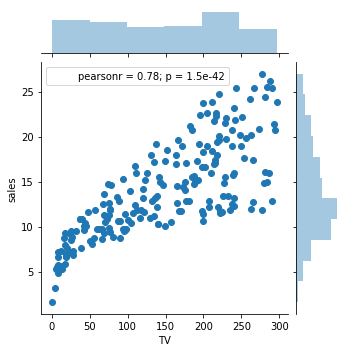

In [18]:
# TV vs. Sales
sns.jointplot(x='TV',
y='sales',
data=df, size=5)

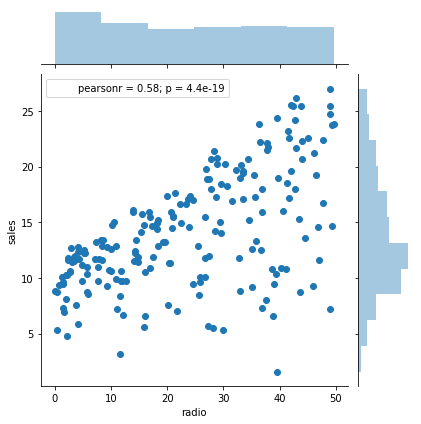

In [19]:
# Radio vs. Sales
sns.jointplot(x='radio',
y='sales',
data=df, size=6)

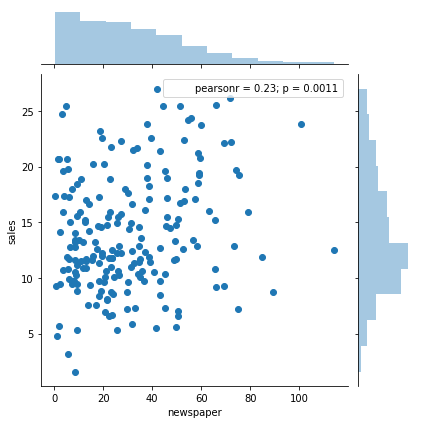

In [20]:
# Newspaper vs. Sales

sns.jointplot(x='newspaper',
y='sales',
data=df, size=6)

In [21]:
#Covariance Analysis 

y = df["sales"]
df = df.drop(["sales"],1)

df_transpose = np.array(df).T
df_cov = np.cov(df_transpose)

In [22]:
df_cov

array([[7370.94989322,   69.86249246,  105.91945226],
       [  69.86249246,  220.42774271,  114.49697889],
       [ 105.91945226,  114.49697889,  474.30832563]])

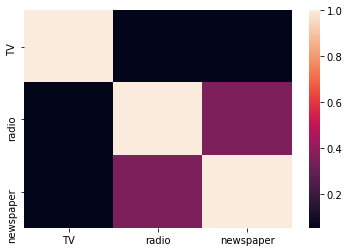

In [23]:
ax = sns.heatmap(df.corr())

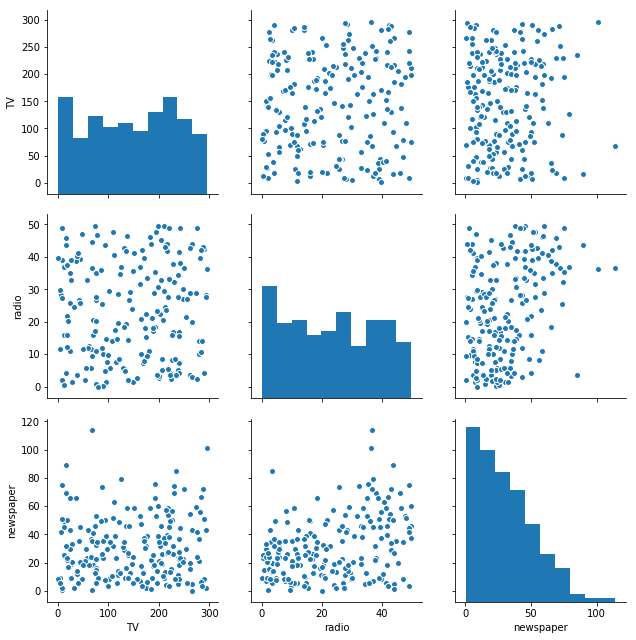

In [24]:
sns.pairplot(df,size=3)

**Data Exploration Conclusion: TV and Radio are strongly correlated with sales and Newspaper advertisements are not. However, no two variables are highly correlated amongst themselves.**

In [25]:
## Data Splitting

In [26]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(df,y,test_size=0.3,random_state = 1)

# Linear Regression: Baseline Model

In [27]:
x_train_constant = sm.add_constant(x_train)
baseline_model = sm.OLS(y_train,x_train_constant)
baseline_fit = baseline_model.fit()
baseline_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     348.9
Date:                Wed, 13 Jun 2018   Prob (F-statistic):           1.18e-63
Time:                        11:07:37   Log-Likelihood:                -280.14
No. Observations:                 140   AIC:                             568.3
Df Residuals:                     136   BIC:                             580.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9372      0.390      7.540      0.000       2.167       3.708
TV             0.0470      0.002     26.432      0.000       0.043       0.050
radio          0.1766      0.011     15.971      0.000       0.155       0.198
newspaper      0.0019      0.008      0.236      0.813      -0.014       0.017
==============================================================================
Omnibus:                       38.709   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.386
Skew:                          -1.243   Prob(JB):                     1.16e-16
Kurtosis:                       5.530   Cond. No.                         432.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observations: Here we can see that newspaper sales are not statistially significant and therefore this validates our earlier observation.**

In [28]:
y_pred_baseline = baseline_fit.predict(x_train_constant)
rmse_baseline = sm.tools.eval_measures.rmse(y_train,y_pred_baseline)
print("Baseline RMSE is:",rmse_baseline)

Baseline RMSE is: 1.7897255222345272


In [29]:
#Interaction Term included

In [35]:
x_train['tv_radio'] = x_train.TV * x_train.radio 
#x_train = x_train.drop(["newspaper"],1)
x_train_constant_interact = sm.add_constant(x_train)
interact_model = sm.OLS(y_train,x_train_constant_interact).fit()
#aseline_fit = baseline_model.fit()
interact_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     1177.
Date:                Wed, 13 Jun 2018   Prob (F-statistic):           4.63e-97
Time:                        11:11:25   Log-Likelihood:                -200.92
No. Observations:                 140   AIC:                             409.8
Df Residuals:                     136   BIC:                             421.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8862      0.314     21.959      0.000       6.266       7.506
TV             0.0186      0.002      9.512      0.000       0.015       0.022
radio          0.0215      0.011      1.982      0.050    4.57e-05       0.043
tv_radio       0.0011    6.6e-05     16.910      0.000       0.001       0.001
==============================================================================
Omnibus:                       93.304   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              696.079
Skew:                          -2.296   Prob(JB):                    7.05e-152
Kurtosis:                      12.912   Cond. No.                     1.72e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
y_pred_interact = interact_model.predict(x_train_constant_interact)
rmse_interact = sm.tools.eval_measures.rmse(y_train,y_pred_interact)
print("Interaction model training RMSE is:",rmse_interact)

Interaction model training RMSE is: 1.0163039582309683


# Prediction on test dataset

In [38]:
x_test['tv_radio'] = x_test.TV * x_test.radio 
x_test = x_test.drop(["newspaper"],1)

x_test_constant_interact = sm.add_constant(x_test)

y_pred_test = interact_model.predict(x_test_constant_interact)
rmse_interact_test = sm.tools.eval_measures.rmse(y_test,y_pred_test)
print("Interaction model Test RMSE is:",rmse_interact_test)

Interaction model Test RMSE is: 0.7144049117782366


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
import numpy as np

x = np.array([[2,1],[2,1]])

x_1 = np.array([[2,1],[2,1]])

## Plot Results

In [39]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_train,y_train)
print(regr.coef_)
print(regr.intercept_)

# Create a coordinate grid# Create 
Radio = np.arange(0,50)
TV = np.arange(0,300)
TV_Radio = np.arange(0,13550)

B1, B2,B3 = np.meshgrid(Radio, TV,TV_Radio, indexing='xy')
Z = np.zeros((TV.size, Radio.size,TV_Radio.size))

for (i,j,k),v in np.ndenumerate(Z):
        Z[i,j,k] =(regr.intercept_ + B1[i,j,k]*regr.coef_[0] + B2[i,j,k]*regr.coef_[1]+B3[i,j,k]*regr.coef_[2])

[0.01861055 0.02153867 0.00111581]
6.886226780856926


In [40]:

# Create plot# Create 
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV + TV_Radio', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(advertising.Radio, advertising.TV, advertising.Sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales');

NameError: name 'axes3d' is not defined